# Note
1. Melakukan percobaan build_models v4.0
2. Dilakukan pada hari Sabtu, 10 Agustus 2024
3. Tempat di Lab
4. Data menggunakan Dataset yang dari Roboflow 
4. Meliputi Class: 20 Kelas Aksara Jawa:
- Ba, Ca, Da, Dha, Ga, Ha, Ja, Ka, La, Ma, 
- Na, Nga, Nya, Pa, Ra, Sa, Ta, Tha, Wa, Ya

# Setup Environment 

In [ ]:
# pip install tensorflow

In [ ]:
# pip install keras

In [ ]:
# pip install opencv-python

In [ ]:
# pip install imutils

In [ ]:
# pip install matplotlib

In [ ]:
# pip install seaborn

In [ ]:
# pip install scikit-learn

# Import Library

In [2]:
# import pandas as pd
# import matplotlib.pyplot as plt  
# import os
# from os.path import join
# import random
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# from tensorflow.keras.utils import to_categorical
# from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
# from keras.models import Sequential
# from tensorflow.keras import layers, models
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization , Activation,Conv2D
# from keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
# from sklearn.metrics import roc_curve, auc, roc_auc_score
# from sklearn.metrics import classification_report
# import seaborn as sns
# from sklearn.metrics import classification_report, accuracy_score,roc_curve,confusion_matrix 

# Preprocessing

In [15]:
import os
import pandas as pd
import cv2

def convert_to_png(image_path, output_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    # Create the output directory if it doesn't exist
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    # Save the image as PNG
    cv2.imwrite(output_path, image)

def get_last_n_parts(path, n):
    return os.path.join(*path.split(os.sep)[-n:])

def create_labels_csv(data_collection, output_csv, path_output):
    # Check if the CSV file already exists
    if os.path.exists(output_csv):
        print(f'Label CSV already exists at: {output_csv}')
        return  # Exit the function if the file already exists
    
    # List to store image file paths and their corresponding labels and dimensions
    data = []

    # Traverse the dataset directory
    for root, dirs, files in os.walk(data_collection):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):
                # Get the class label from the subdirectory name
                label = os.path.basename(root)
                # Get the full file path
                file_path = os.path.join(root, file)
                
                # Create a new file path for the PNG image
                relative_path = os.path.relpath(file_path, data_collection)
                png_file_path = os.path.join(path_output, os.path.splitext(relative_path)[0] + '.png')
                
                # Convert the image to PNG
                convert_to_png(file_path, png_file_path)
                
                # Get image dimensions
                img = cv2.imread(file_path)
                height, width, _ = img.shape
                
                # Get only the last 3 parts of the path for CSV
                csv_path = get_last_n_parts(png_file_path, 2)
                
                # Append to the data list including dimensions
                data.append([csv_path, width, height, label])
    
    # Create a DataFrame from the data list
    df = pd.DataFrame(data, columns=['file_path', 'width', 'height', 'label'])
    
    # Save the DataFrame to a CSV file
    df.to_csv(output_csv, index=False)
    print(f'Labels CSV file created at: {output_csv}')

# Define the paths for the two datasets and their respective output directories
data_collection = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_original\\Four_Data_Sources\\"
output_csv = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.4_data_custom\\labels.csv"
path_output = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.4_data_custom\\"

# Process the dataset
create_labels_csv(data_collection, output_csv, path_output)

Label CSV already exists at: C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v3.4_data_custom\labels.csv


In [16]:
import pandas as pd

# Path main
PATH_MAIN = path_output
file = PATH_MAIN + "labels.csv"
df = pd.read_csv(file)
df.head()

,file_path,width,height,label
0,ba\002798ad-631c-4f0c-b899-aa66fb5c2ac1.png,239,167,ba
1,ba\040ab1c7-bffa-4a93-8c42-54e5597f2243.png,96,67,ba
2,ba\0789a0d8-e129-48ec-b74e-2e53f4a7ece9.png,235,166,ba
3,ba\11f6c317-635a-4e64-8552-05bf8b7b3a95.png,96,67,ba
4,ba\13469389-6f9b-43dc-be99-8dfbfaae51cb.png,235,165,ba


Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v3.4_data_custom\ba is  220
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v3.4_data_custom\ca is  220
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v3.4_data_custom\da is  220
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v3.4_data_custom\dha is  220
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v3.4_data_custom\ga is  220
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v3.4_data_custom\ha is  220
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v3.4_data_custom\ja is  220
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v3.4_data_custom\ka is  220
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v3.4_data_custom\la is  220
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v3.4_data_custom\ma is  220
Jumlah File C:\Users\wawn1\projects_skr

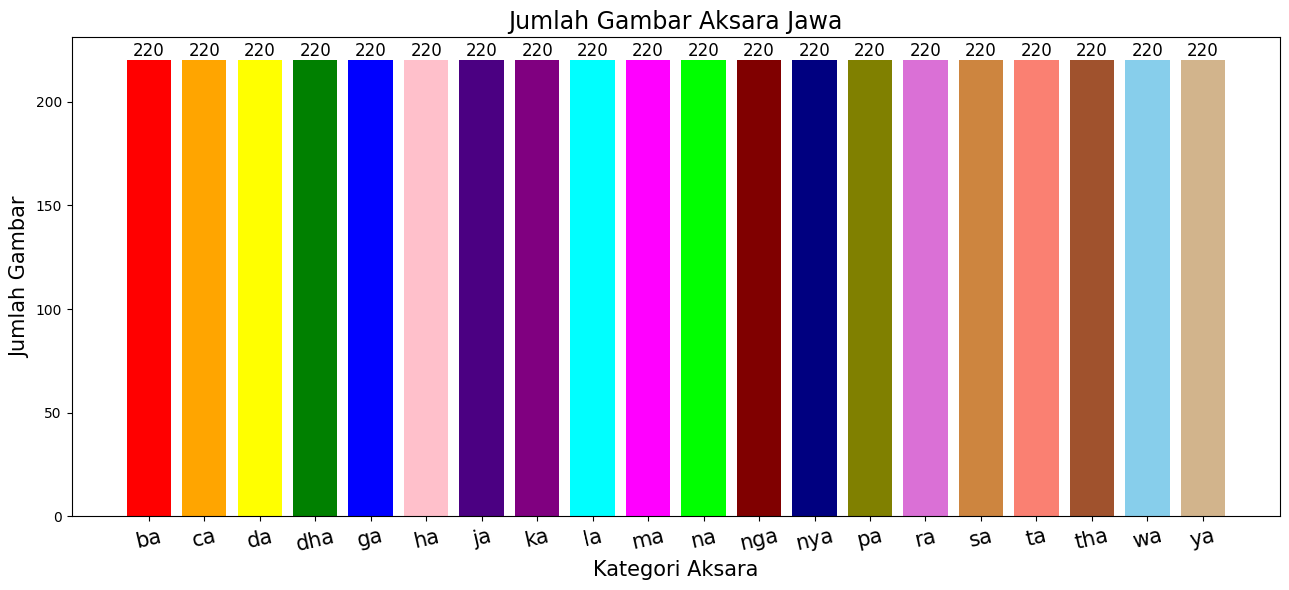

In [17]:
import matplotlib.pyplot as plt
import os

# Define an empty list
file_counts = []
aksara_categories = ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na',
                     'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']

def countFile(link):
    path = link
    num_files = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    file_counts.append(num_files)
    print(f"Jumlah File {link} is ", num_files)

# Define the input path
base_path = PATH_MAIN

# Count files for each category
for category in aksara_categories:
    countFile(os.path.join(base_path, category))

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'pink', 'indigo', 'purple', 
          'cyan', 'magenta', 'lime', 'maroon', 'navy', 'olive', 'orchid', 'peru', 
          'salmon', 'sienna', 'skyblue', 'tan']  # Colors for each bar

# Create bar chart
plt.figure(figsize=(13, 6))
bars = plt.bar(aksara_categories, file_counts, color=colors)
plt.xlabel('Kategori Aksara', fontsize=15)
plt.ylabel('Jumlah Gambar', fontsize=15)
plt.title('Jumlah Gambar Aksara Jawa', fontsize=17)
plt.xticks(fontsize=15, rotation=13)
plt.tight_layout()

# Add text labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()

In [18]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define the input path and aksaraJowo
INPUT_PATH = PATH_MAIN  
AKSARA = aksara_categories

# Define the target image size
IMAGE_SIZE = (96, 96)
INPUT_SHAPE = (96, 96, 1)

def apply_custom_preprocessing(image):
    # Apply Gaussian Blur
    ApplyGaussian = cv2.GaussianBlur(image, (15, 15), 0.1) # Unblur
    # Apply laplacian filter 
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    img = cv2.filter2D(ApplyGaussian, -1, kernel)
    # Remove noise using median filter
    img = cv2.medianBlur(img, 1)
    # Apply Otsu's thresholding
    thresh = 0
    maxValue = 255
    
    th, img = cv2.threshold(img, thresh, maxValue, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)    
    return img

def create_image_generator(input_path, aksaraJowo, image_size):
    for index, jowo in enumerate(aksaraJowo):
        aksara_path = os.path.join(input_path, jowo)
        
        for filename in os.listdir(aksara_path):
            image_path = os.path.join(aksara_path, filename)
            original_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)  # Baca dan ubah warna asli
            original_image_resized = cv2.resize(original_image, image_size, interpolation=cv2.INTER_AREA)  # Resize gambar asli
            grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Baca gambar sebagai grayscale
            grayscale_image_resized = cv2.resize(grayscale_image, image_size, interpolation=cv2.INTER_AREA)  # Resize gambar grayscale
            image_filtered = apply_custom_preprocessing(grayscale_image_resized)
            
            yield original_image_resized, grayscale_image_resized, image_filtered, index

# tranform list to numpy array
def load_images(input_path, aksaraJowo, image_size):
    X_original, X_grayscale, X_filtered, y_label = [], [], [], []
    
    for original_image, grayscale_image, image_filtered, label in create_image_generator(input_path, aksaraJowo, image_size):
        X_original.append(original_image)
        X_grayscale.append(grayscale_image)
        X_filtered.append(image_filtered)
        y_label.append(label)
        
    X_original = np.array(X_original)
    X_grayscale = np.array(X_grayscale)
    X_filtered = np.array(X_filtered)
    y_label = to_categorical(np.array(y_label))
    
    return X_original, X_grayscale, X_filtered, y_label

# Load images with custom preprocessing applied
X_original, X_grayscale, X_filtered, y_label = load_images(INPUT_PATH, AKSARA, IMAGE_SIZE)

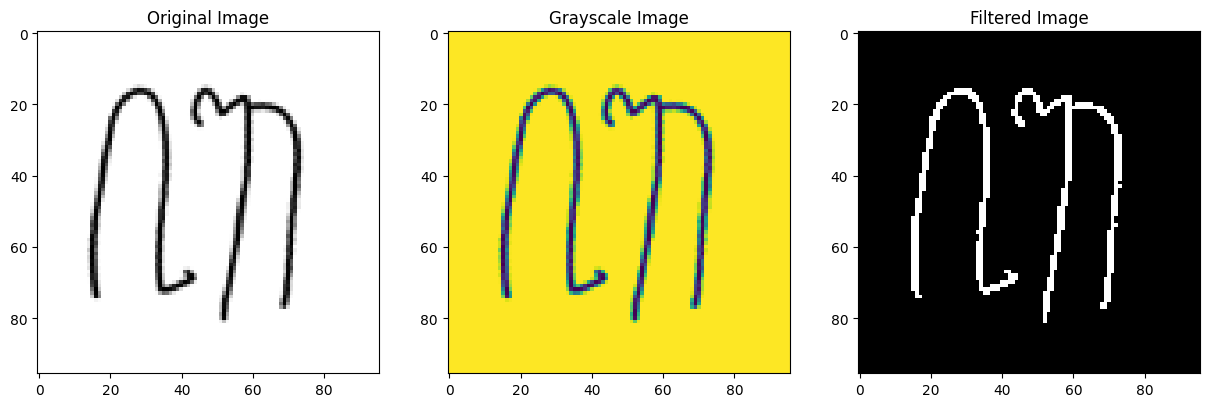

In [19]:
# Select one image to display
index_to_display = 100

# Display the original image, grayscale image, and filtered image
original_image = X_original[index_to_display]
grayscale_image = X_grayscale[index_to_display]
filtered_image = X_filtered[index_to_display]

# Plot the images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(original_image)
plt.axis('on')

plt.subplot(1, 3, 2)
plt.title('Grayscale Image')
plt.imshow(grayscale_image)
plt.axis('on')

plt.subplot(1, 3, 3)
plt.title('Filtered Image')
# plt.imshow(filtered_image, cmap='gray')
plt.imshow(filtered_image, cmap='gray')
plt.axis('on')

plt.show()

In [20]:
# Reshape X_filtered
X_filtered_reshaped = X_filtered.reshape(-1, 96, 96, 1) / 255  # Reshape dan normalisasi

print("X_filtered shape after reshape:", X_filtered_reshaped.shape)

X_filtered shape after reshape: (4400, 96, 96, 1)


In [21]:
from sklearn.model_selection import train_test_split

# Tahap pertama: Membagi data menjadi data pelatihan (80%) dan data pengujian (20%)
X_train, X_test, y_train, y_test = train_test_split(X_filtered_reshaped, y_label, test_size=0.2, random_state=54)

# Verifikasi ukuran data
print("Ukuran data pelatihan:", X_train.shape, y_train.shape)
print("Ukuran data pengujian:", X_test.shape, y_test.shape)

Ukuran data pelatihan: (3520, 96, 96, 1) (3520, 20)
Ukuran data pengujian: (880, 96, 96, 1) (880, 20)


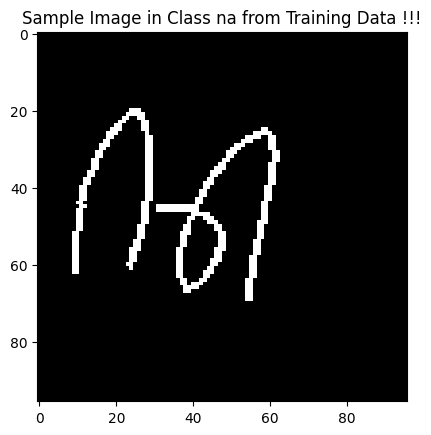

In [22]:
# Menampilkan salah satu gambar dari data pelatihan
plt.imshow(X_train[100], cmap='gray')
plt.title("Sample Image in Class {} from Training Data !!!".format(AKSARA[np.argmax(y_train[100])]))
plt.axis('on')
plt.show()

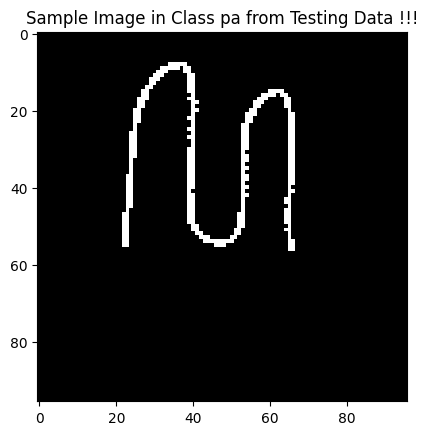

In [23]:
# Menampilkan salah satu gambar dari data pelatihan
plt.imshow(X_test[150], cmap='gray')
plt.title("Sample Image in Class {} from Testing Data !!!".format(AKSARA[np.argmax(y_test[150])]))
plt.axis('on')
plt.show()

# Build the Model

## Training Models_1 - 50

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras import optimizers

# Set hyperparameters tuning
optimizer = 'SGD'
learning_rate = 0.0001
dropout_rate = 0.2
weight_decay = 0.0001
momentum = 0.9
clip_norm = 0.0
num_classes = 20
input_shape = INPUT_SHAPE

def create_model(input_shape, num_classes, optimizer_name, learning_rate, dropout_rate, weight_decay, momentum, clip_norm):
    model = Sequential()

    # Block 1
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    # Block 2
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    # Block 3
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    # Block 4
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    # Block 5
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    # Flatten
    model.add(Flatten())

    # Dense layers
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Define optimizer with hyperparameters
    if optimizer_name == 'SGD':
        optimizer = optimizers.SGD(learning_rate=learning_rate, decay=weight_decay, momentum=momentum, clipnorm=clip_norm)
    elif optimizer_name == 'Adam':
        optimizer = optimizers.Adam(learning_rate=learning_rate, decay=weight_decay, clipnorm=clip_norm)
    elif optimizer_name == 'RMSprop':
        optimizer = optimizers.RMSprop(learning_rate=learning_rate, decay=weight_decay, clipnorm=clip_norm)
    else:
        raise ValueError("Optimizer not supported. Choose from 'SGD', 'Adam', or 'RMSprop'.")

    # Compile model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create the model
model = create_model(input_shape=input_shape, num_classes=num_classes, optimizer_name=optimizer, learning_rate=learning_rate, 
                     dropout_rate=dropout_rate, weight_decay=weight_decay, momentum=momentum, clip_norm=clip_norm)

# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 96, 96, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 96, 96, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 96, 96, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 96, 96, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 48, 48, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 13,081,460 (49.90 MB)

 Trainable params: 13,072,628 (49.87 MB)

 Non-trainable params: 8,832 (34.50 KB)

In [12]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import pandas as pd
import numpy as np

# Callback for logging to CSV
class CustomCSVLogger(Callback):
    def __init__(self, filename):
        super(CustomCSVLogger, self).__init__()
        self.filename = filename
        self.epoch = 1

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['epoch'] = self.epoch
        self.epoch += 1
        df = pd.DataFrame([logs])
        if epoch == 0:
            df.to_csv(self.filename, mode='w', index=False)
        else:
            df.to_csv(self.filename, mode='a', header=False, index=False)

# Callback for testing evaluation
class TestEvaluationCallback(Callback):
    def __init__(self, test_data, test_log_filename):
        self.test_data = test_data
        self.test_log_filename = test_log_filename
        self.test_loss = []
        self.test_accuracy = []

    def on_epoch_end(self, epoch, logs=None):
        test_loss, test_accuracy = self.model.evaluate(self.test_data[0], self.test_data[1], verbose=0)
        self.test_loss.append(test_loss)
        self.test_accuracy.append(test_accuracy)
        print(f'\nEpoch {epoch+1}: Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
        # Save test evaluation to CSV
        with open(self.test_log_filename, 'a') as f:
            f.write(f"{epoch+1},{test_loss},{test_accuracy}\n")

# Define paths
csv_logger_v1 = "C:\\Users\\wawn1\\projects_skripsi\\save_models\\save_models_csv\\v4.4.8_log_train_v1.csv"
test_log_v1 = "C:\\Users\\wawn1\\projects_skripsi\\save_models\\save_models_csv\\v4.4.8_log_test_v1.csv"
model_filepath_v1 = "C:\\Users\\wawn1\\projects_skripsi\\save_models\\save_models_keras\\v4.4.8_keras_v1.keras"

# Define callbacks
# early_stopping = EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=25, min_lr=0.0001)
csv_logger = CustomCSVLogger(csv_logger_v1)
model_checkpoint = ModelCheckpoint(filepath=model_filepath_v1, monitor='accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='auto')
test_eval_callback = TestEvaluationCallback((X_test, y_test), test_log_v1)

# Initialize test log file with header
with open(test_log_v1, 'w') as f:
    f.write("epoch,test_loss,test_accuracy\n")

# Train the model and save the logs to CSV
hist_v1 = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    callbacks=[
        # early_stopping,
        # reduce_lr,
        model_checkpoint,
        csv_logger,
        test_eval_callback
    ]
)

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.0483 - loss: 3.9903 
Epoch 1: Test Loss: 3.1494569778442383, Test Accuracy: 0.053409092128276825
55/55 ━━━━━━━━━━━━━━━━━━━━ 644s 11s/step - accuracy: 0.0483 - loss: 3.9898 - epoch: 1.0000
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.0556 - loss: 3.9404
Epoch 2: Test Loss: 3.3702051639556885, Test Accuracy: 0.053409092128276825
55/55 ━━━━━━━━━━━━━━━━━━━━ 552s 10s/step - accuracy: 0.0557 - loss: 3.9391 - epoch: 2.0000
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.0788 - loss: 3.7519 
Epoch 3: Test Loss: 3.55391001701355, Test Accuracy: 0.053409092128276825
55/55 ━━━━━━━━━━━━━━━━━━━━ 912s 16s/step - accuracy: 0.0788 - loss: 3.7512 - epoch: 3.0000
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.0932 - loss: 3.5661
Epoch 4: Test Loss: 3.9455771446228027, Test Accuracy: 0.053409092128276825
55/55 ━━━━━━━━━━━━━━━━━━━━ 609s 11s/step - accuracy: 0.0933 - loss: 3.5657 - epoch: 4.00

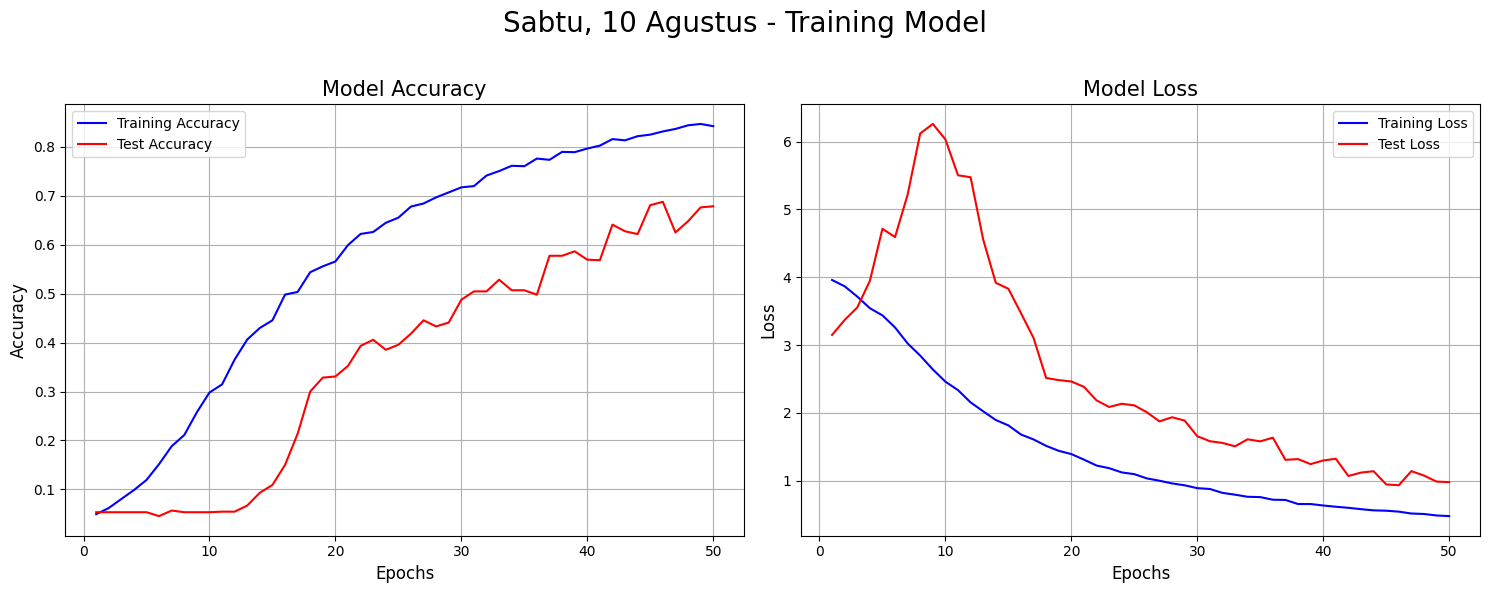

In [13]:
try:
    history_df = pd.read_csv(csv_logger_v1)
except FileNotFoundError:
    print(f"File tidak ditemukan di path: {csv_logger_v1}")
    history_df = None
try:
    test_history_df = pd.read_csv(test_log_v1)
except FileNotFoundError:
    print(f"File tidak ditemukan di path: {test_log_v1}")
    test_history_df = None

if history_df is not None and test_history_df is not None:
    # Dapatkan jumlah epoch dari panjang data
    epochs = range(1, len(history_df) + 1)

    # Plot akurasi dan loss
    plt.figure(figsize=(15, 6))
    plt.suptitle("Sabtu, 10 Agustus - Training Model", fontsize=20)

    # Plot Akurasi Training, Validasi & Testing
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history_df['accuracy'], label='Training Accuracy', color='blue')
    # plt.plot(epochs, history_df['val_accuracy'], label='Validation Accuracy', color='green')
    plt.plot(test_history_df['epoch'], test_history_df['test_accuracy'], label='Test Accuracy', color='red')  # Plot Test Accuracy per epoch
    plt.title('Model Accuracy', fontsize=15)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(loc='best')
    plt.grid(True)

    # Plot Loss Training, Validasi & Testing
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history_df['loss'], label='Training Loss', color='blue')
    # plt.plot(epochs, history_df['val_loss'], label='Validation Loss', color='green')
    plt.plot(test_history_df['epoch'], test_history_df['test_loss'], label='Test Loss', color='red')  # Plot Test Loss per epoch
    plt.title('Model Loss', fontsize=15)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(loc='best')
    plt.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

## Training Models_50 - 65

In [14]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Callback for logging to CSV
class CustomCSVLogger(Callback):
    def __init__(self, filename, initial_epoch=1):
        super(CustomCSVLogger, self).__init__()
        self.filename = filename
        self.epoch = initial_epoch

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['epoch'] = self.epoch
        self.epoch += 1
        df = pd.DataFrame([logs])
        if epoch == 0 and self.epoch == 2:
            df.to_csv(self.filename, mode='w', index=False)
        else:
            df.to_csv(self.filename, mode='a', header=False, index=False)

# Callback for testing evaluation
class TestEvaluationCallback(Callback):
    def __init__(self, test_data, test_log_filename, initial_epoch=1):
        self.test_data = test_data
        self.test_log_filename = test_log_filename
        self.initial_epoch = initial_epoch

    def on_epoch_end(self, epoch, logs=None):
        test_loss, test_accuracy = self.model.evaluate(self.test_data[0], self.test_data[1], verbose=0)
        print(f'\nEpoch {epoch+1}: Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
        # Save test evaluation to CSV
        with open(self.test_log_filename, 'a') as f:
            f.write(f"{epoch+1},{test_loss},{test_accuracy}\n")

# Define paths
csv_logger_v1 = "C:\\Users\\wawn1\\projects_skripsi\\save_models\\save_models_csv\\v4.4.8_log_train_v1.csv"
test_log_v1 = "C:\\Users\\wawn1\\projects_skripsi\\save_models\\save_models_csv\\v4.4.8_log_test_v1.csv"
model_filepath_v1 = "C:\\Users\\wawn1\\projects_skripsi\\save_models\\save_models_keras\\v4.4.8_keras_v1.keras"

# Load the last saved model
try:
    model = tf.keras.models.load_model(model_filepath_v1)
    print("Model loaded from checkpoint.")
except Exception as e:
    print(f"Failed to load model from checkpoint: {e}")

# Determine the last epoch trained
try:
    history_df = pd.read_csv(csv_logger_v1)
    initial_epoch = history_df['epoch'].max()
except FileNotFoundError:
    print(f"File tidak ditemukan di path: {csv_logger_v1}")
    history_df = None
    initial_epoch = 1

try:
    test_history_df = pd.read_csv(test_log_v1)
except FileNotFoundError:
    print(f"File tidak ditemukan di path: {test_log_v1}")
    test_history_df = None

# Define callbacks
# early_stopping = EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=25, min_lr=0.0001)
csv_logger = CustomCSVLogger(csv_logger_v1, initial_epoch=initial_epoch + 1)
model_checkpoint = ModelCheckpoint(filepath=model_filepath_v1, monitor='accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='auto')
test_eval_callback = TestEvaluationCallback((X_test, y_test), test_log_v1, initial_epoch=initial_epoch + 1)

# Train the model and save the logs to CSV
hist_v1 = model.fit(
    X_train, y_train,
    # validation_data=(X_val, y_val),
    epochs=initial_epoch + 15,  # change this to the desired number of total epochs
    batch_size=64,
    initial_epoch=initial_epoch,
    callbacks=[
        # early_stopping,
        # reduce_lr,
        model_checkpoint,
        csv_logger,
        test_eval_callback
    ]
)

Model loaded from checkpoint.
Epoch 51/65
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.8381 - loss: 0.4937
Epoch 51: Test Loss: 0.9213051795959473, Test Accuracy: 0.6954545378684998
55/55 ━━━━━━━━━━━━━━━━━━━━ 395s 7s/step - accuracy: 0.8381 - loss: 0.4935 - epoch: 51.0000
Epoch 52/65
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.8549 - loss: 0.4701
Epoch 52: Test Loss: 0.9811779260635376, Test Accuracy: 0.6670454740524292
55/55 ━━━━━━━━━━━━━━━━━━━━ 444s 7s/step - accuracy: 0.8548 - loss: 0.4702 - epoch: 52.0000
Epoch 53/65
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.8529 - loss: 0.4652
Epoch 53: Test Loss: 0.87601637840271, Test Accuracy: 0.7102272510528564
55/55 ━━━━━━━━━━━━━━━━━━━━ 386s 7s/step - accuracy: 0.8529 - loss: 0.4651 - epoch: 53.0000
Epoch 54/65
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.8635 - loss: 0.4382
Epoch 54: Test Loss: 0.8615652322769165, Test Accuracy: 0.7170454263687134
55/55 ━━━━━━━━━━━━━━━━━━━━ 443s 7s/step - accuracy: 0.8636 - lo

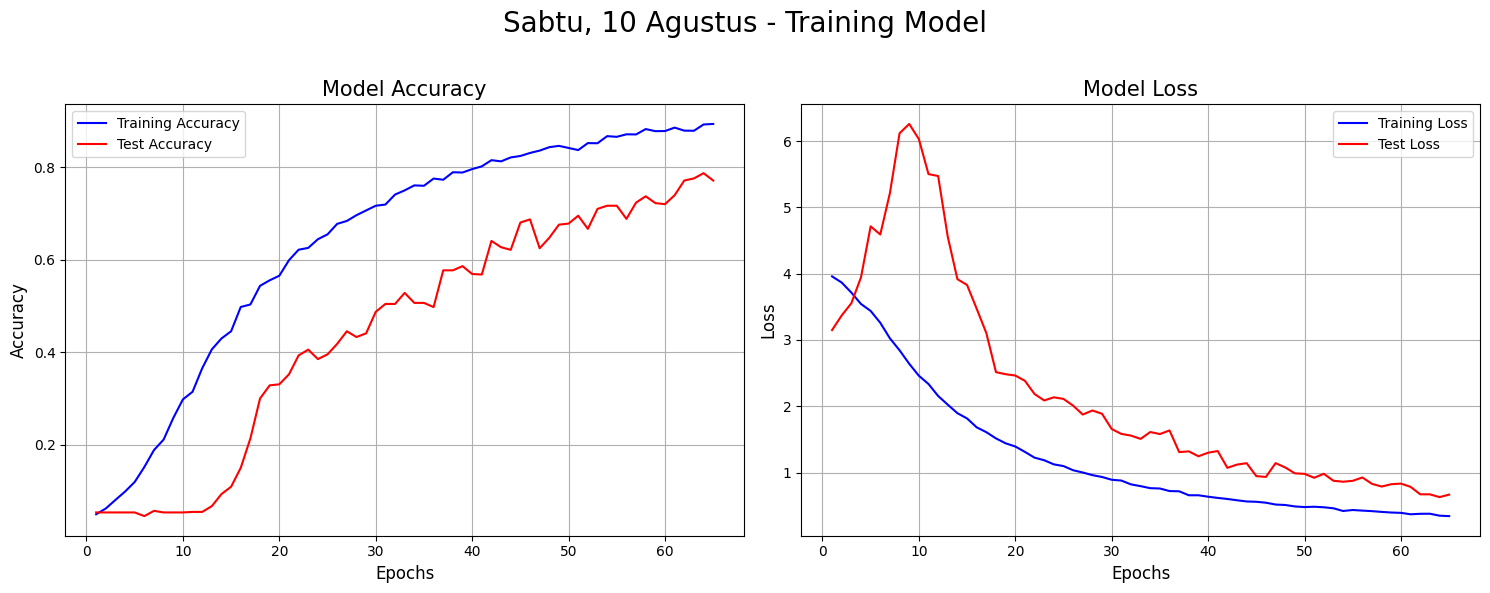

In [15]:
# Muat data dari file CSV
try:
    history_df = pd.read_csv(csv_logger_v1)
except FileNotFoundError:
    print(f"File tidak ditemukan di path: {csv_logger_v1}")
    history_df = None

try:
    test_history_df = pd.read_csv(test_log_v1)
except FileNotFoundError:
    print(f"File tidak ditemukan di path: {test_log_v1}")
    test_history_df = None

if history_df is not None and test_history_df is not None:
    # Dapatkan jumlah epoch dari panjang data
    epochs = range(1, len(history_df) + 1)

    # Plot akurasi dan loss
    plt.figure(figsize=(15, 6))
    plt.suptitle("Sabtu, 10 Agustus - Training Model", fontsize=20)

    # Plot Akurasi Training, Validasi & Testing
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history_df['accuracy'], label='Training Accuracy', color='blue')
    # plt.plot(epochs, history_df['val_accuracy'], label='Validation Accuracy', color='green')
    plt.plot(test_history_df['epoch'], test_history_df['test_accuracy'], label='Test Accuracy', color='red')  # Plot Test Accuracy per epoch
    plt.title('Model Accuracy', fontsize=15)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(loc='best')
    plt.grid(True)

    # Plot Loss Training, Validasi & Testing
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history_df['loss'], label='Training Loss', color='blue')
    # plt.plot(epochs, history_df['val_loss'], label='Validation Loss', color='green')
    plt.plot(test_history_df['epoch'], test_history_df['test_loss'], label='Test Loss', color='red')  # Plot Test Loss per epoch
    plt.title('Model Loss', fontsize=15)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(loc='best')
    plt.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

## Training Models_150 - 350

In [10]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Callback for logging to CSV
class CustomCSVLogger(Callback):
    def __init__(self, filename, initial_epoch=1):
        super(CustomCSVLogger, self).__init__()
        self.filename = filename
        self.epoch = initial_epoch

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['epoch'] = self.epoch
        self.epoch += 1
        df = pd.DataFrame([logs])
        if epoch == 0 and self.epoch == 2:
            df.to_csv(self.filename, mode='w', index=False)
        else:
            df.to_csv(self.filename, mode='a', header=False, index=False)

# Callback for testing evaluation
class TestEvaluationCallback(Callback):
    def __init__(self, test_data, test_log_filename, initial_epoch=1):
        self.test_data = test_data
        self.test_log_filename = test_log_filename
        self.initial_epoch = initial_epoch

    def on_epoch_end(self, epoch, logs=None):
        test_loss, test_accuracy = self.model.evaluate(self.test_data[0], self.test_data[1], verbose=0)
        print(f'\nEpoch {epoch+1}: Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
        # Save test evaluation to CSV
        with open(self.test_log_filename, 'a') as f:
            f.write(f"{epoch+1},{test_loss},{test_accuracy}\n")

# Define paths
csv_logger_v1 = "C:\\Users\\USER-03\\W\\projects_skripsi\\save_models\\save_models_csv\\v4.4.8_log_train_v1.csv"
test_log_v1 = "C:\\Users\\USER-03\\W\\projects_skripsi\\save_models\\save_models_csv\\v4.4.8_log_test_v1.csv"
model_filepath_v1 = "C:\\Users\\USER-03\\W\\projects_skripsi\\save_models\\save_models_keras\\v4.4.8_keras_v1.keras"

# Load the last saved model
try:
    model = tf.keras.models.load_model(model_filepath_v1)
    print("Model loaded from checkpoint.")
except Exception as e:
    print(f"Failed to load model from checkpoint: {e}")

# Determine the last epoch trained
try:
    history_df = pd.read_csv(csv_logger_v1)
    initial_epoch = history_df['epoch'].max()
except FileNotFoundError:
    print(f"File tidak ditemukan di path: {csv_logger_v1}")
    history_df = None
    initial_epoch = 1

try:
    test_history_df = pd.read_csv(test_log_v1)
except FileNotFoundError:
    print(f"File tidak ditemukan di path: {test_log_v1}")
    test_history_df = None

# Define callbacks
# early_stopping = EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=25, min_lr=0.0001)
csv_logger = CustomCSVLogger(csv_logger_v1, initial_epoch=initial_epoch + 1)
model_checkpoint = ModelCheckpoint(filepath=model_filepath_v1, monitor='accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='auto')
test_eval_callback = TestEvaluationCallback((X_test, y_test), test_log_v1, initial_epoch=initial_epoch + 1)

# Train the model and save the logs to CSV
hist_v1 = model.fit(
    X_train, y_train,
    # validation_data=(X_val, y_val),
    epochs=initial_epoch + 285,  # change this to the desired number of total epochs
    batch_size=64,
    initial_epoch=initial_epoch,
    callbacks=[
        # early_stopping,
        # reduce_lr,
        model_checkpoint,
        csv_logger,
        test_eval_callback
    ]
)

Model loaded from checkpoint.
Epoch 66/350
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8940 - loss: 0.3296
Epoch 66: Test Loss: 0.6302801370620728, Test Accuracy: 0.7863636612892151
55/55 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.8939 - loss: 0.3298 - epoch: 66.0000
Epoch 67/350
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8962 - loss: 0.3293
Epoch 67: Test Loss: 0.6284631490707397, Test Accuracy: 0.7943181991577148
55/55 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.8961 - loss: 0.3295 - epoch: 67.0000
Epoch 68/350
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8858 - loss: 0.3542
Epoch 68: Test Loss: 0.6278857588768005, Test Accuracy: 0.7920454740524292
55/55 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.8859 - loss: 0.3540 - epoch: 68.0000
Epoch 69/350
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9017 - loss: 0.3175
Epoch 69: Test Loss: 0.658782422542572, Test Accuracy: 0.7738636136054993
55/55 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.9016 - l

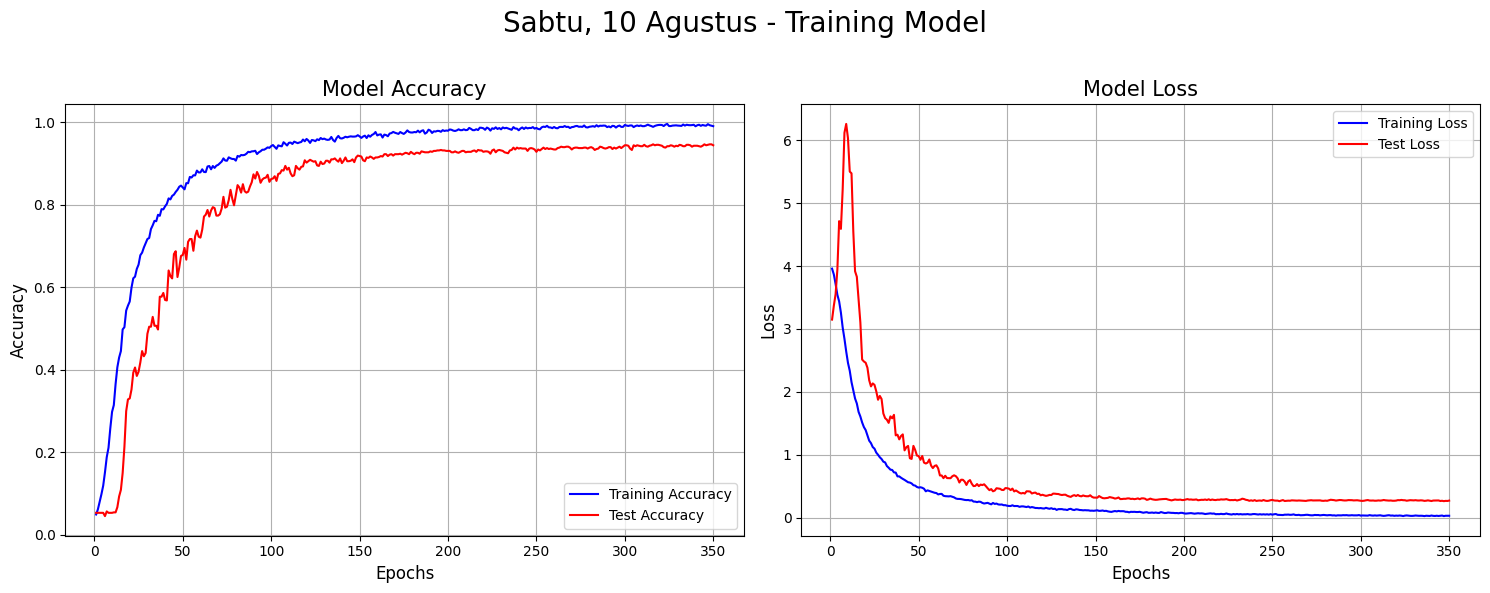

In [11]:
# Muat data dari file CSV
try:
    history_df = pd.read_csv(csv_logger_v1)
except FileNotFoundError:
    print(f"File tidak ditemukan di path: {csv_logger_v1}")
    history_df = None

try:
    test_history_df = pd.read_csv(test_log_v1)
except FileNotFoundError:
    print(f"File tidak ditemukan di path: {test_log_v1}")
    test_history_df = None

if history_df is not None and test_history_df is not None:
    # Dapatkan jumlah epoch dari panjang data
    epochs = range(1, len(history_df) + 1)

    # Plot akurasi dan loss
    plt.figure(figsize=(15, 6))
    plt.suptitle("Sabtu, 10 Agustus - Training Model", fontsize=20)

    # Plot Akurasi Training, Validasi & Testing
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history_df['accuracy'], label='Training Accuracy', color='blue')
    # plt.plot(epochs, history_df['val_accuracy'], label='Validation Accuracy', color='green')
    plt.plot(test_history_df['epoch'], test_history_df['test_accuracy'], label='Test Accuracy', color='red')  # Plot Test Accuracy per epoch
    plt.title('Model Accuracy', fontsize=15)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(loc='best')
    plt.grid(True)

    # Plot Loss Training, Validasi & Testing
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history_df['loss'], label='Training Loss', color='blue')
    # plt.plot(epochs, history_df['val_loss'], label='Validation Loss', color='green')
    plt.plot(test_history_df['epoch'], test_history_df['test_loss'], label='Test Loss', color='red')  # Plot Test Loss per epoch
    plt.title('Model Loss', fontsize=15)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(loc='best')
    plt.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Evaluate Model

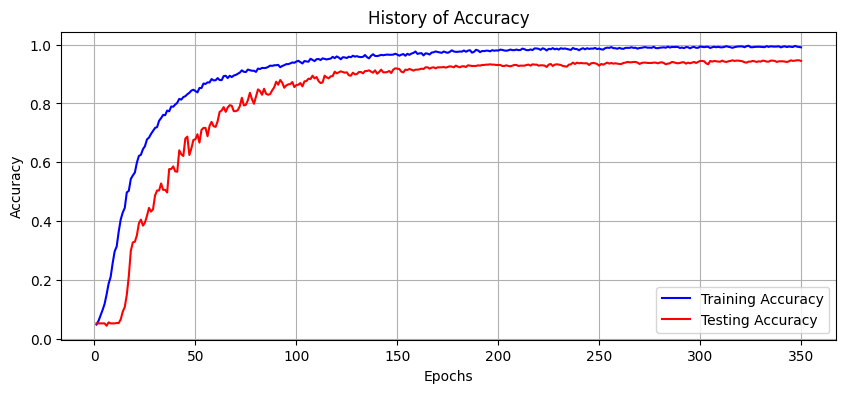

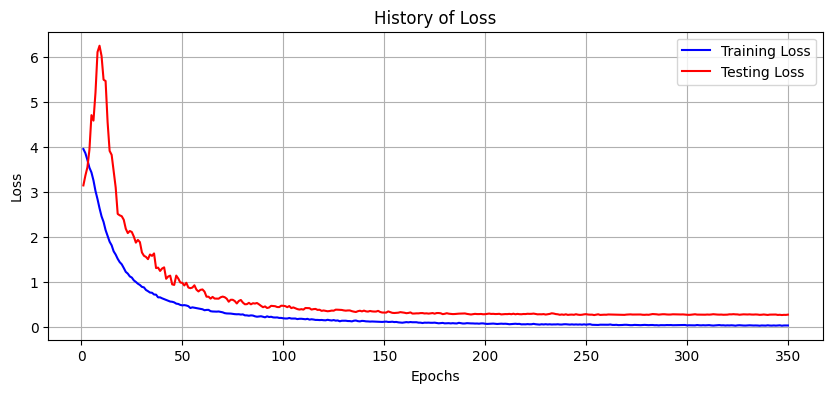

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Muat data dari file CSV
csv_logger_v1 = "C:\\Users\\wawn1\\projects_skripsi\\save_models\\save_models_csv\\v4.4.8_log_train_v1.csv"
test_log_v1 = "C:\\Users\\wawn1\\projects_skripsi\\save_models\\save_models_csv\\v4.4.8_log_test_v1.csv"

try:
    history_df = pd.read_csv(csv_logger_v1)
except FileNotFoundError:
    print(f"File tidak ditemukan di path: {csv_logger_v1}")
    history_df = None

try:
    test_history_df = pd.read_csv(test_log_v1)
except FileNotFoundError:
    print(f"File tidak ditemukan di path: {test_log_v1}")
    test_history_df = None

if history_df is not None and test_history_df is not None:
    # Dapatkan jumlah epoch dari panjang data
    epochs = range(1, len(history_df) + 1)

    # Plot Akurasi
    plt.figure(figsize=(10, 4))  # Mengubah ukuran gambar menjadi lebih kecil
    plt.plot(epochs, history_df['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(test_history_df['epoch'], test_history_df['test_accuracy'], label='Testing Accuracy', color='red')  # Plot Test Accuracy per epoch
    plt.title('History of Accuracy', fontsize=12)
    plt.xlabel('Epochs', fontsize=10)
    plt.ylabel('Accuracy', fontsize=10)
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # Plot Loss
    plt.figure(figsize=(10, 4))  # Mengubah ukuran gambar menjadi lebih kecil
    plt.plot(epochs, history_df['loss'], label='Training Loss', color='blue')
    plt.plot(test_history_df['epoch'], test_history_df['test_loss'], label='Testing Loss', color='red')  # Plot Test Loss per epoch
    plt.title('History of Loss', fontsize=12)
    plt.xlabel('Epochs', fontsize=10)
    plt.ylabel('Loss', fontsize=10)
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

In [25]:
import tensorflow as tf

# Filepath model yang disimpan
model_filepath_v1 = "C:\\Users\\wawn1\\projects_skripsi\\save_models\\save_models_keras\\v4.4.8_keras_v1.keras"

# Load the last saved model
model = tf.keras.models.load_model(model_filepath_v1)

In [26]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score, classification_report, confusion_matrix

# Prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)
y_pred_probabilities = tf.nn.softmax(y_pred).numpy() 
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
log_loss_value = log_loss(y_true_classes, y_pred_probabilities)

# Print metrik evaluasi
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Log Loss: {log_loss_value:.2f}")

28/28 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step
Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94
Log Loss: 2.15


              precision    recall  f1-score   support

          ba       1.00      0.98      0.99        43
          ca       0.95      0.93      0.94        45
          da       0.93      0.91      0.92        44
         dha       0.93      0.89      0.91        46
          ga       0.93      0.93      0.93        41
          ha       0.94      0.94      0.94        47
          ja       1.00      0.97      0.99        38
          ka       1.00      0.86      0.93        44
          la       0.94      0.94      0.94        50
          ma       0.96      0.96      0.96        52
          na       0.85      0.95      0.90        37
         nga       0.95      1.00      0.97        54
         nya       1.00      0.97      0.99        39
          pa       0.90      0.98      0.94        45
          ra       1.00      1.00      1.00        47
          sa       0.88      0.97      0.92        36
          ta       0.82      0.95      0.88        44
         tha       1.00    

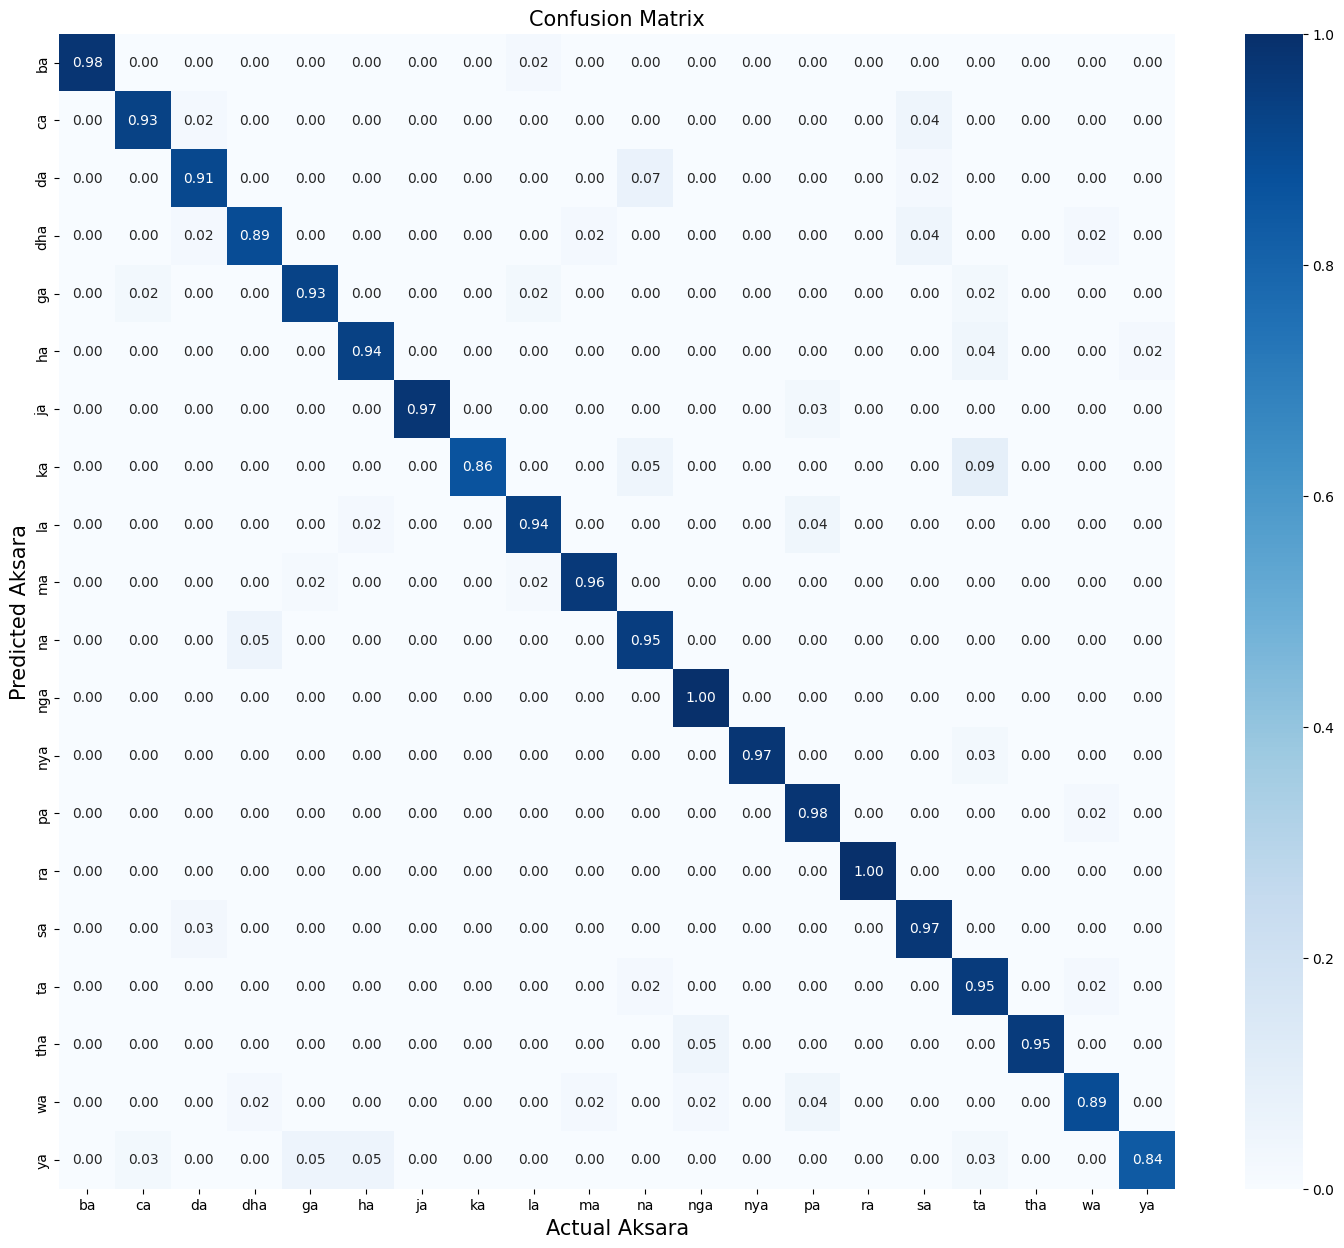

In [27]:
# Tampilkan classification report yang lengkap
report = classification_report(y_true_classes, y_pred_classes, target_names=AKSARA)
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Normalisasi confusion matrix untuk mendapatkan persentase
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Tampilkan confusion matrix sebagai heatmap
plt.figure(figsize=(18, 15))
# sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2%", cmap="YlGnBu", xticklabels=AKSARA, yticklabels=AKSARA)
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=AKSARA, yticklabels=AKSARA)

plt.xlabel("Actual Aksara", fontsize=15)
plt.ylabel("Predicted Aksara", fontsize=15)
# plt.title("Confusion Matrix (Percentage)")
plt.title("Confusion Matrix", fontsize=15)
plt.show()

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix

# Definisikan kelas Aksara
AKSARA = ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'Ma', 
          'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']

# Muat model dari checkpoint
try:
    model = tf.keras.models.load_model(model_filepath_v1)
    print("Model loaded from checkpoint.")
except Exception as e:
    print(f"Failed to load model from checkpoint: {e}")

# Prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)
y_pred_probabilities = tf.nn.softmax(y_pred).numpy()  # Terapkan softmax secara eksplisit jika perlu
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Normalisasi confusion matrix untuk mendapatkan persentase
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Kelas untuk setiap subset
subset1_classes = ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'Ma']
subset2_classes = ['na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']

# Dapatkan indeks untuk setiap subset
subset1_indices = [AKSARA.index(cls) for cls in subset1_classes]
subset2_indices = [AKSARA.index(cls) for cls in subset2_classes]

# Pisahkan confusion matrix untuk dua subset kelas
conf_matrix_subset1 = conf_matrix_normalized[np.ix_(subset1_indices, subset1_indices)]
conf_matrix_subset2 = conf_matrix_normalized[np.ix_(subset2_indices, subset2_indices)]

# Simpan confusion matrix subset 1 sebagai gambar
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_subset1, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=subset1_classes, yticklabels=subset1_classes)
plt.xlabel("Actual Aksara", fontsize=15)
plt.ylabel("Predicted Aksara", fontsize=15)
# plt.title("Confusion Matrix - Subset 1 (Percentage)")
plt.title("Confusion Matrix - Subset 1", fontsize=17)
plt.tight_layout()
plt.savefig("C:\\Users\\wawn1\\projects_skripsi\\img\\v4.4.9_subset1.png")  # Simpan sebagai file gambar
plt.close()  # Tutup plot untuk menghindari overlay

# Simpan confusion matrix subset 2 sebagai gambar
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_subset2, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=subset2_classes, yticklabels=subset2_classes)
plt.xlabel("Actual Aksara", fontsize=15)
plt.ylabel("Predicted Aksara", fontsize=15)
# plt.title("Confusion Matrix - Subset 2 (Percentage)")
plt.title("Confusion Matrix - Subset 2", fontsize=17)
plt.tight_layout()
plt.savefig("C:\\Users\\wawn1\\projects_skripsi\\img\\v4.4.9_subset2.png")  # Simpan sebagai file gambar
plt.close()  # Tutup plot untuk menghindari overlay

Model loaded from checkpoint.
28/28 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step


# Predictive Model

28/28 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step


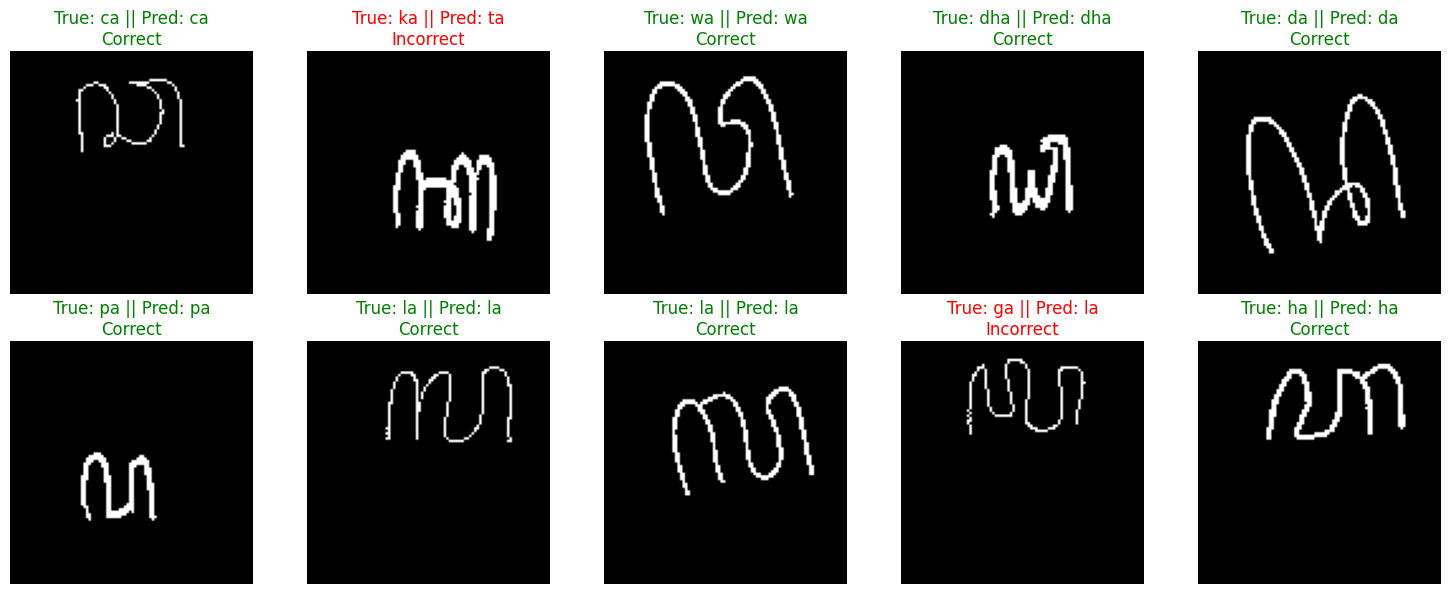

In [28]:
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

# Define the function to display images with predictions
def display_images_with_predictions(images, true_labels, predictions, labels, max_images=10):
    num_images = min(len(images), max_images)
    cols = 5
    rows = (num_images + cols - 1) // cols  # Compute number of rows needed

    plt.figure(figsize=(15, 3 * rows))
    
    for i in range(num_images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        
        # Check if prediction is correct
        correct = true_labels[i] == predictions[i]
        result = "Correct" if correct else "Incorrect"
        color = "green" if correct else "red"
        
        # Adjust title to avoid overlapping
        plt.title(
            f"True: {labels[true_labels[i]]} || Pred: {labels[predictions[i]]}\n{result}",
            color=color,
            fontsize=12,  # Set font size
            pad=5  # Add padding to title
        )
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Load the trained model
model = load_model(model_filepath_v1)

# Perform predictions
y_pred_probabilities = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)

# Convert one-hot encoded y_test to class indices if needed
if y_test.ndim == 2:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test

# Display some test images with predictions
display_images_with_predictions(X_test, y_test_classes, y_pred_classes, AKSARA)

28/28 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step


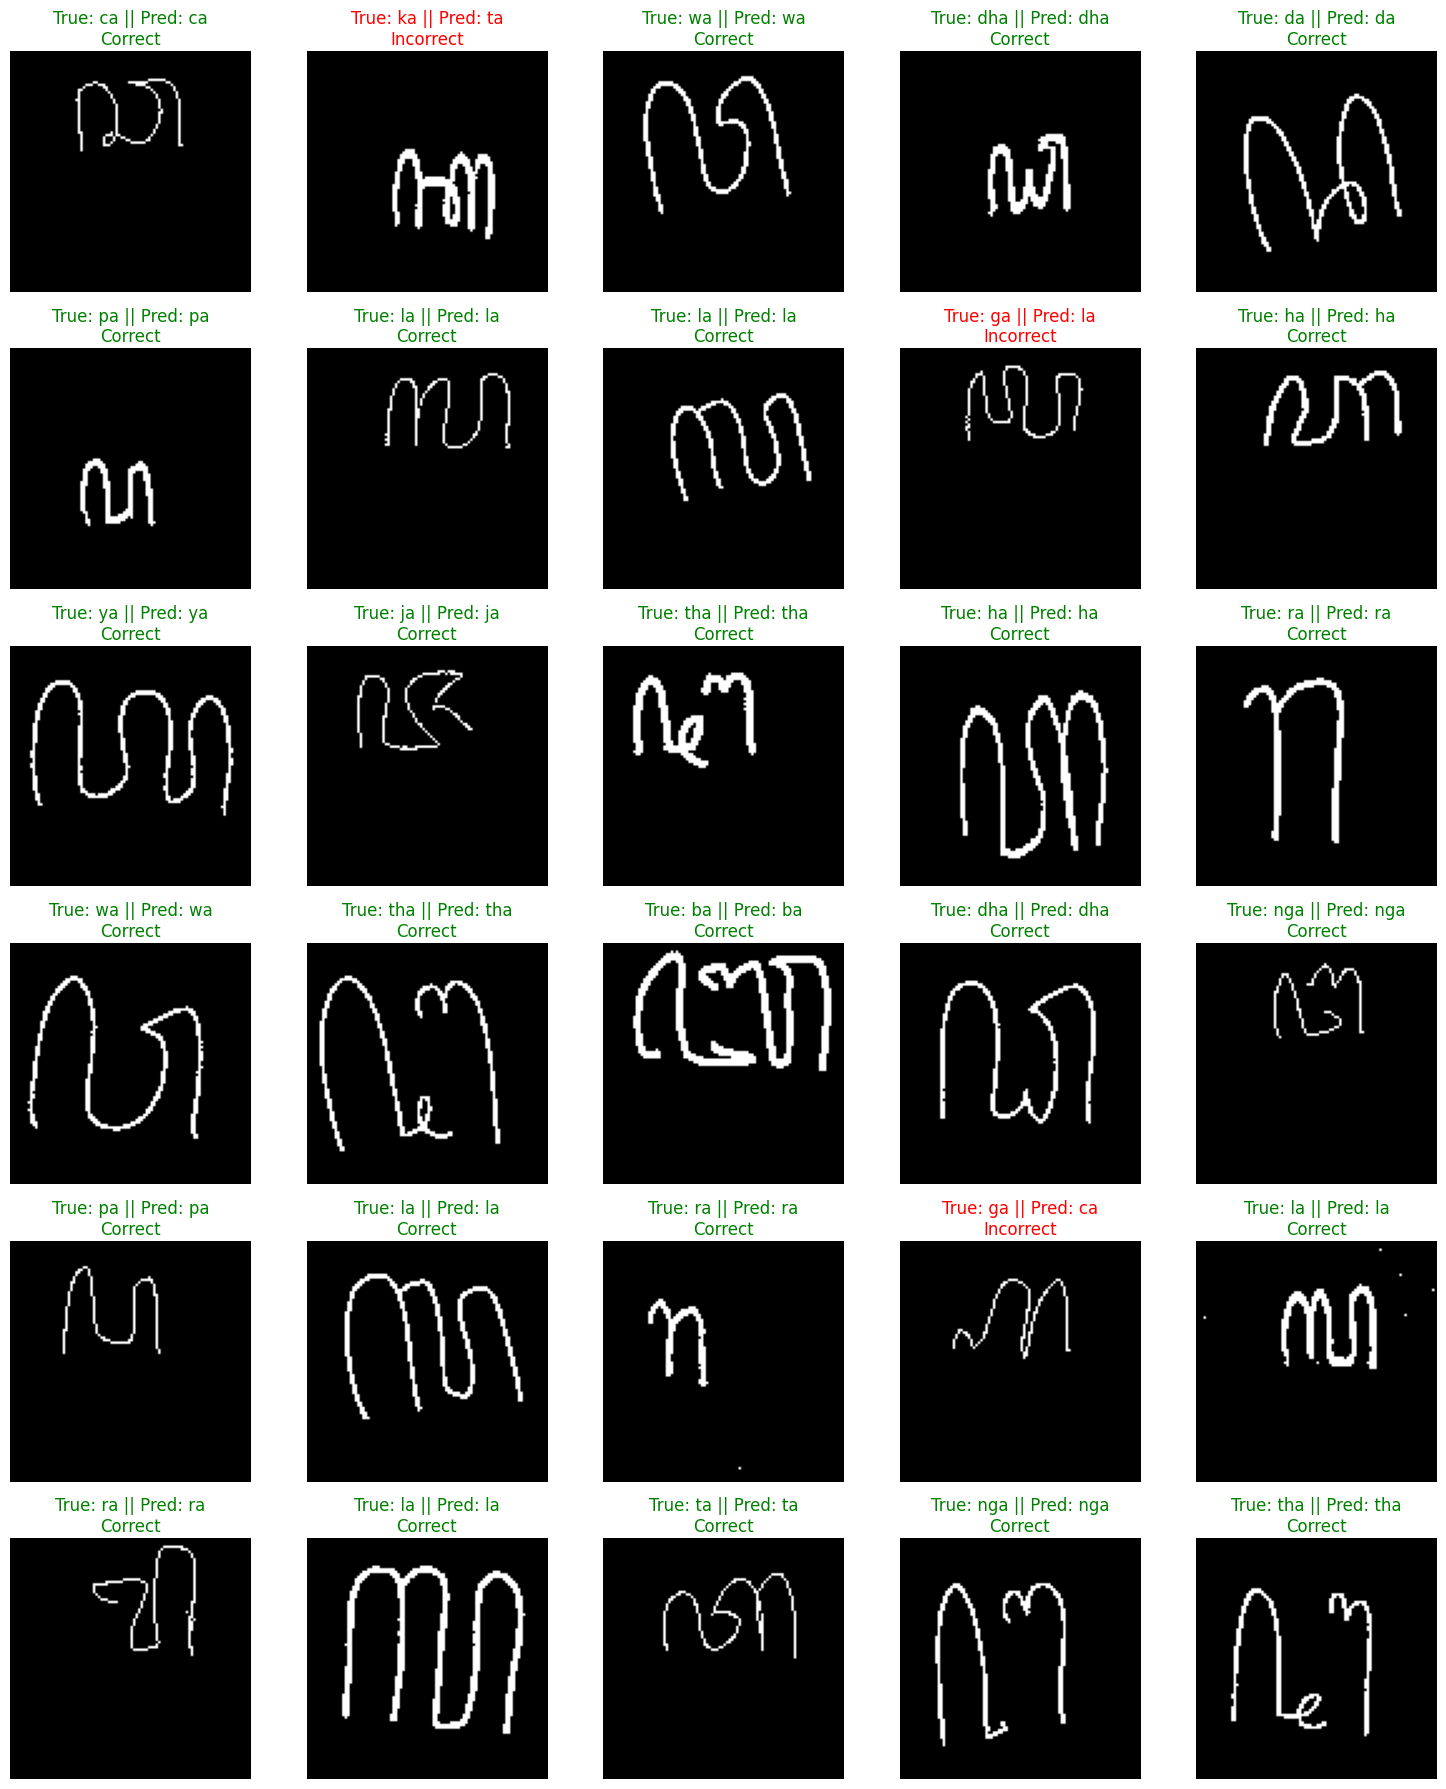

In [29]:
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

# Define the function to display images with predictions
def display_images_with_predictions(images, true_labels, predictions, labels, max_images=30):
    num_images = min(len(images), max_images)
    cols = 5
    rows = (num_images + cols - 1) // cols  # Compute number of rows needed

    plt.figure(figsize=(15, 3 * rows))
    
    for i in range(num_images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        
        # Check if prediction is correct
        correct = true_labels[i] == predictions[i]
        result = "Correct" if correct else "Incorrect"
        color = "green" if correct else "red"
        
        # Adjust title to avoid overlapping
        plt.title(
            f"True: {labels[true_labels[i]]} || Pred: {labels[predictions[i]]}\n{result}",
            color=color,
            fontsize=12,  # Set font size
            pad=5  # Add padding to title
        )
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Load the trained model
model = load_model(model_filepath_v1)

# Perform predictions
y_pred_probabilities = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)

# Convert one-hot encoded y_test to class indices if needed
if y_test.ndim == 2:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test

# Display some test images with predictions
display_images_with_predictions(X_test, y_test_classes, y_pred_classes, AKSARA)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction output:
 [[9.7859484e-01 4.0490139e-07 4.2244372e-09 3.1959519e-07 2.1000522e-05
  7.1239751e-06 2.9599116e-06 5.8240861e-08 6.6178941e-08 3.6435861e-07
  2.2474593e-08 1.7902423e-02 1.8169237e-07 6.9511850e-07 9.9436789e-08
  1.4882107e-08 2.6340990e-06 4.2268917e-07 3.4661505e-03 5.9586274e-09]]
Score:  0.97859484
Aksara:  ba


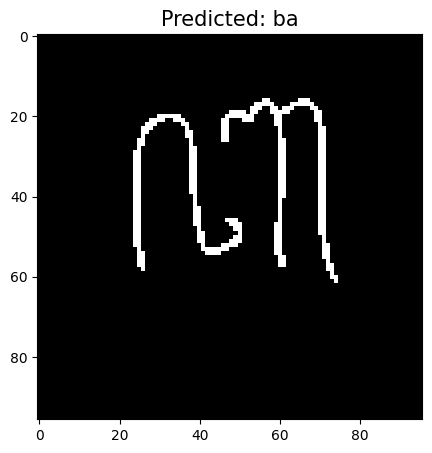

In [17]:
import numpy as np
import cv2
from keras.preprocessing import image
from keras.models import load_model
import matplotlib.pyplot as plt

# Define the custom preprocessing function
def apply_custom_preprocessing(image):
    # Convert image to uint8 if not already
    if image.dtype != np.uint8:
        image = np.uint8(image)
        
    # Apply Gaussian Blur
    ApplyGaussian = cv2.GaussianBlur(image, (15, 15), 0.1) # Unblur
    # Apply laplacian filter 
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    img = cv2.filter2D(ApplyGaussian, -1, kernel)
    # Remove noise using median filter
    img = cv2.medianBlur(img, 1)
    # Apply Otsu's thresholding
    thresh = 0
    maxValue = 255
    
    th, img = cv2.threshold(img, thresh, maxValue, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)    
    return img

# Define the function to preprocess the image
def preprocess_image(img_path, image_size):
    # Load the image
    img = image.load_img(img_path, color_mode='grayscale')
    # Convert the image to array
    img_array = image.img_to_array(img)
    
    # Resize the image using INTER_AREA interpolation
    img_array_resized = cv2.resize(img_array, image_size, interpolation=cv2.INTER_AREA)
    
    # Apply custom preprocessing
    img_array_preprocessed = apply_custom_preprocessing(img_array_resized)
    
    # Normalize the image
    img_array_preprocessed = img_array_preprocessed.astype("float32") / 255.0
    # Expand dimensions to match input shape
    img_array_preprocessed = np.expand_dims(img_array_preprocessed, axis=-1)
    img_array_preprocessed = np.expand_dims(img_array_preprocessed, axis=0)
    
    return img_array_preprocessed

# Load the trained model
model = load_model(model_filepath_v1)  # Replace with your model path

# Path to the test image
test_image_path = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_original\\CustomData\\data_prediction\\ba49.mine2.png"
image_size = IMAGE_SIZE

# Preprocess the image
preprocessed_image = preprocess_image(test_image_path, image_size)

# Perform the prediction
output = model.predict(preprocessed_image)

# Find the index of the maximum value in the output
pos = np.argmax(output)

# Print the result based on the index
print("Prediction output:\n", output)
print("Score: ", output[0][pos])

# Define a variable to store the predicted label
predicted_label = ""

# Print the class based on the position using if-elif
if pos == 0:
    predicted_label = "ba"
elif pos == 1:
    predicted_label = 'ca'
elif pos == 2:
    predicted_label = 'da'
elif pos == 3:
    predicted_label = 'dha'
elif pos == 4:
    predicted_label = 'ga'
elif pos == 5:
    predicted_label = 'ha'
elif pos == 6:
    predicted_label = 'ja'
elif pos == 7:
    predicted_label = 'ka'
elif pos == 8:
    predicted_label = 'la'
elif pos == 9:
    predicted_label = 'ma'
elif pos == 10:
    predicted_label = 'na'
elif pos == 11:
    predicted_label = 'nga'
elif pos == 12:
    predicted_label = 'nya'
elif pos == 13:
    predicted_label = 'pa'
elif pos == 14:
    predicted_label = 'ra'
elif pos == 15:
    predicted_label = 'sa'
elif pos == 16:
    predicted_label = 'ta'
elif pos == 17:
    predicted_label = 'tha'
elif pos == 18:
    predicted_label = 'wa'
elif pos == 19:
    predicted_label = 'ya'

# Print the predicted label
print("Aksara: ", predicted_label)

# Display the preprocessed image with prediction
plt.figure(figsize=(5, 5))

# Preprocessed Image
preprocessed_for_display = apply_custom_preprocessing(image.img_to_array(image.load_img(test_image_path, target_size=image_size, color_mode='grayscale')))
plt.imshow(preprocessed_for_display.squeeze(), cmap='gray')
# plt.title(f"Predicted: {predicted_label} || Score: {output[0][pos]:.8f}")
plt.title(f"Predicted: {predicted_label}", fontsize=15)
plt.axis('on')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediction output:
 [[7.76701758e-10 2.44889463e-07 1.09415893e-07 1.78903536e-09
  1.61751728e-07 9.75663883e-10 1.14303305e-07 5.44727907e-09
  2.40075715e-09 3.45590161e-06 1.19496292e-07 5.09427991e-06
  4.34712533e-09 1.87575864e-07 9.99981761e-01 4.53645640e-07
  5.57914603e-10 8.22770744e-06 7.32032390e-08 1.78262494e-09]]
Score:  0.99998176
Aksara:  ra


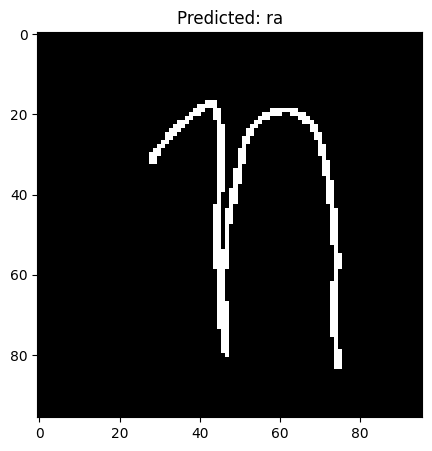

In [18]:
import numpy as np
import cv2
from keras.preprocessing import image
from keras.models import load_model
import matplotlib.pyplot as plt

# Define the custom preprocessing function
def apply_custom_preprocessing(image):
    # Convert image to uint8 if not already
    if image.dtype != np.uint8:
        image = np.uint8(image)
        
    # Apply Gaussian Blur
    ApplyGaussian = cv2.GaussianBlur(image, (15, 15), 0.1) 
    # Apply Laplacian filter 
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    img = cv2.filter2D(ApplyGaussian, -1, kernel)
    # Remove noise using median filter
    img = cv2.medianBlur(img, 1)
    # Apply Otsu's thresholding
    thresh = 0
    maxValue = 255
    
    th, img = cv2.threshold(img, thresh, maxValue, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)    
    return img

# Define the function to preprocess the image
def preprocess_image(img_path, image_size):
    # Load the image
    img = image.load_img(img_path, color_mode='grayscale')
    # Convert the image to array
    img_array = image.img_to_array(img)
    
    # Resize the image using INTER_AREA interpolation
    img_array_resized = cv2.resize(img_array, image_size, interpolation=cv2.INTER_AREA)
    
    # Apply custom preprocessing
    img_array_preprocessed = apply_custom_preprocessing(img_array_resized)
    
    # Normalize the image
    img_array_preprocessed = img_array_preprocessed.astype("float32") / 255.0
    # Expand dimensions to match input shape
    img_array_preprocessed = np.expand_dims(img_array_preprocessed, axis=-1)
    img_array_preprocessed = np.expand_dims(img_array_preprocessed, axis=0)
    
    return img_array_preprocessed, img_array_resized  # Return both images if needed

# Load the trained model
model = load_model(model_filepath_v1)

# Path to the test image
test_image_path = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_original\\CustomData\\data_prediction\\ra3.png"
image_size = IMAGE_SIZE

# Preprocess the image
preprocessed_image, original_image = preprocess_image(test_image_path, image_size)

# Perform the prediction
output = model.predict(preprocessed_image)

# Find the index of the maximum value in the output
max_val = output[0][0]
pos = 0
for i in range(1, len(output[0])):
    if output[0][i] > max_val:
        max_val = output[0][i]
        pos = i

# Print the result based on the index
print("Prediction output:\n", output)
print("Score: ", max_val)

# Define labels
labels = ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 
          'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']
predicted_label = labels[pos]
print("Aksara: ", predicted_label)

# Display the preprocessed image with prediction
plt.figure(figsize=(5, 5))

# Preprocessed Image
preprocessed_for_display = apply_custom_preprocessing(cv2.resize(image.img_to_array(image.load_img(test_image_path, color_mode='grayscale')), image_size, interpolation=cv2.INTER_AREA))
plt.imshow(preprocessed_for_display.squeeze(), cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.axis('on')

plt.show()